In [1]:
import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append('/data/des81.b/data/tavangar/streams/code')
import glob

import numpy as np
import healpy as hp
import fitsio as fits
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import scipy.ndimage as nd
from utils import load_infiles

import ugali
from ugali import isochrone

import skymap, skymap.survey
from skymap.utils import cel2gal, gal2cel
from skymap.utils import setdefaults

from streamlib import skymap_factory
import streamlib
import results
import rotation_matrix
import plot_hess
import filter_data

from polyfit2d import polyfit2d
from numpy.polynomial import polynomial

import importlib
import imp

import region_plot

/data/des81.b/data/tavangar/streams/code/streamlib.py:14: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/traitlets/config/application.py", line 658, i

In [2]:
sfd = hp.read_map('/data/des81.b/data/tavangar/streams/lambda_sfd_ebv.fits')
nside = hp.get_nside(sfd)
ra,dec = hp.pix2ang(nside,np.arange(hp.nside2npix(nside)),lonlat=True)
galpix = hp.ang2pix(nside,*cel2gal(ra,dec),lonlat=True)
sfd = sfd[galpix]

#planck = fitsio.read('COM_CompMap_ThermalDust-commander_2048_R2.00.fits')['I_ML_FULL']
planck = hp.read_map('/data/des81.b/data/tavangar/streams/COM_CompMap_ThermalDust-commander_2048_R2.00.fits')
nside = hp.get_nside(planck)
ra,dec = hp.pix2ang(nside,np.arange(hp.nside2npix(nside)),lonlat=True)
galpix = hp.ang2pix(nside,*cel2gal(ra,dec),lonlat=True)
planck = planck[galpix]

NSIDE = 512
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


/home/s1/tavangar/.local/lib/python2.7/site-packages/healpy/fitsfunc.py:371: UserWarning: No INDXSCHM keyword in header file : assume IMPLICIT
  warnings.warn("No INDXSCHM keyword in header file : " "assume {}".format(schm))


NSIDE = 2048
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


## Functions for Plotting

In [3]:
import region_plot

def draw_image(xx,yy,data,**kwargs):
    ax = plt.gca()
    ax.pcolormesh(xx,yy,data,**kwargs)
    #ax.scatter(RA,DEC,c='r',s=15)
    ax.set_aspect('equal')
    ax.invert_xaxis()
    ax.set_ylabel('Dec (deg)')
    ax.set_xlabel('RA (deg)')
    plt.grid('on',ls=':',color='gray')

In [4]:
hpxcube, fracdet, modulus = region_plot.load_hpxcube(
    '/data/des81.b/data/tavangar/streams/des/DES_Y6_iso_hpxcube_z0.0001_a11.0_gmax24_gmin3p5_E2_C0p050p1.fits.gz')

Reading /data/des81.b/data/tavangar/streams/des/DES_Y6_iso_hpxcube_z0.0001_a11.0_gmax24_gmin3p5_E2_C0p050p1.fits.gz...
Skipping fracdet...


In [5]:
#reload(region_plot)
%matplotlib inline
data = region_plot.prepare_hpxmap(16, hpxcube, fracdet, modulus)
xx,yy,vv = region_plot.run(data, dust=sfd, planck=planck, sigma=0.15)
plt.title('m-M = 16.0')

/data/des81.b/data/tavangar/streams/code/polyfit2d.py:29: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  c = np.linalg.lstsq(vander, f)[0]


Text(0.5,1,'m-M = 16.0')

Error in callback <function post_execute at 0x7ff29f8508c0> (for post_execute):


OSError: [Errno 2] No such file or directory: 'dvipng'

OSError: [Errno 2] No such file or directory: 'dvipng'

<Figure size 720x720 with 1 Axes>

15.0
11.957155000211916


/data/des51.b/data/tavangar/streams/code/polyfit2d.py:29: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  c = np.linalg.lstsq(vander, f)[0]


Text(0.5,1,'m-M = 17.0')

/home/s1/tavangar/.local/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


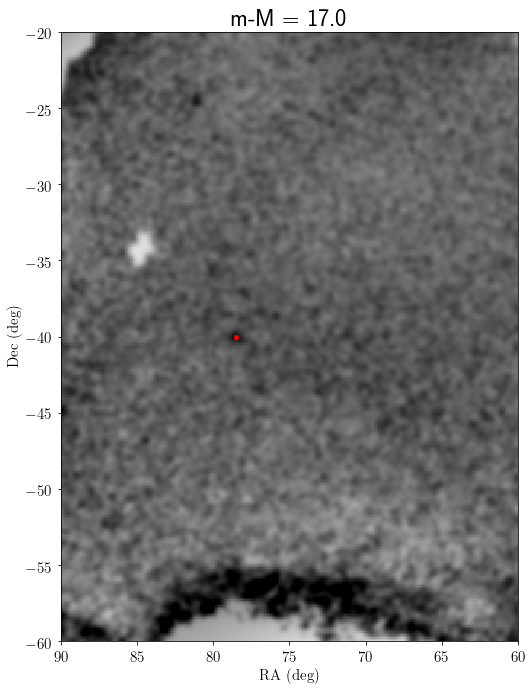

In [72]:
reload(region_plot)
%matplotlib inline
data = region_plot.prepare_hpxmap(17.9, hpxcube, fracdet, modulus)
xx,yy,vv = region_plot.run(data, dust=sfd, planck=planck, sigma=0.2)

plt.title('m-M = 17.0') 

15.0
9.273393975536369


/data/des51.b/data/tavangar/streams/code/polyfit2d.py:29: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  c = np.linalg.lstsq(vander, f)[0]


15.0
9.273393975536369


/data/des51.b/data/tavangar/streams/code/polyfit2d.py:29: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  c = np.linalg.lstsq(vander, f)[0]


15.0
8.796416120976485


/data/des51.b/data/tavangar/streams/code/polyfit2d.py:29: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  c = np.linalg.lstsq(vander, f)[0]


15.0
8.796416120976485


/data/des51.b/data/tavangar/streams/code/polyfit2d.py:29: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  c = np.linalg.lstsq(vander, f)[0]


15.0
9.077783187446371


/data/des51.b/data/tavangar/streams/code/polyfit2d.py:29: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  c = np.linalg.lstsq(vander, f)[0]


15.0
9.077783187446371


/data/des51.b/data/tavangar/streams/code/polyfit2d.py:29: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  c = np.linalg.lstsq(vander, f)[0]


15.0
10.360938394732493


/data/des51.b/data/tavangar/streams/code/polyfit2d.py:29: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  c = np.linalg.lstsq(vander, f)[0]


15.0
10.360938394732493


/data/des51.b/data/tavangar/streams/code/polyfit2d.py:29: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  c = np.linalg.lstsq(vander, f)[0]


15.0
11.558176067802345


/data/des51.b/data/tavangar/streams/code/polyfit2d.py:29: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  c = np.linalg.lstsq(vander, f)[0]


15.0
11.558176067802345


/data/des51.b/data/tavangar/streams/code/polyfit2d.py:29: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  c = np.linalg.lstsq(vander, f)[0]


15.0
12.122055750416497


/data/des51.b/data/tavangar/streams/code/polyfit2d.py:29: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  c = np.linalg.lstsq(vander, f)[0]


15.0
12.122055750416497


/data/des51.b/data/tavangar/streams/code/polyfit2d.py:29: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  c = np.linalg.lstsq(vander, f)[0]


15.0
12.433375490367862


/data/des51.b/data/tavangar/streams/code/polyfit2d.py:29: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  c = np.linalg.lstsq(vander, f)[0]


15.0
12.433375490367862


/data/des51.b/data/tavangar/streams/code/polyfit2d.py:29: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  c = np.linalg.lstsq(vander, f)[0]


15.0
11.908875623220325


/data/des51.b/data/tavangar/streams/code/polyfit2d.py:29: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  c = np.linalg.lstsq(vander, f)[0]


15.0
11.908875623220325


/data/des51.b/data/tavangar/streams/code/polyfit2d.py:29: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  c = np.linalg.lstsq(vander, f)[0]


15.0
12.698800875807702


/data/des51.b/data/tavangar/streams/code/polyfit2d.py:29: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  c = np.linalg.lstsq(vander, f)[0]


15.0
12.698800875807702


/data/des51.b/data/tavangar/streams/code/polyfit2d.py:29: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  c = np.linalg.lstsq(vander, f)[0]


15.0
12.032340796010576


/data/des51.b/data/tavangar/streams/code/polyfit2d.py:29: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  c = np.linalg.lstsq(vander, f)[0]


15.0
12.032340796010576


/data/des51.b/data/tavangar/streams/code/polyfit2d.py:29: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  c = np.linalg.lstsq(vander, f)[0]


15.0
11.4809155295833


/data/des51.b/data/tavangar/streams/code/polyfit2d.py:29: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  c = np.linalg.lstsq(vander, f)[0]
/home/s1/tavangar/.local/lib/python2.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


15.0
11.4809155295833


/data/des51.b/data/tavangar/streams/code/polyfit2d.py:29: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  c = np.linalg.lstsq(vander, f)[0]
/home/s1/tavangar/.local/lib/python2.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


15.0
11.23403909350359


/data/des51.b/data/tavangar/streams/code/polyfit2d.py:29: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  c = np.linalg.lstsq(vander, f)[0]
/home/s1/tavangar/.local/lib/python2.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


15.0
11.23403909350359


/data/des51.b/data/tavangar/streams/code/polyfit2d.py:29: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  c = np.linalg.lstsq(vander, f)[0]
/home/s1/tavangar/.local/lib/python2.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


15.0
10.16974365391664


/data/des51.b/data/tavangar/streams/code/polyfit2d.py:29: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  c = np.linalg.lstsq(vander, f)[0]
/home/s1/tavangar/.local/lib/python2.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


15.0
10.16974365391664


/data/des51.b/data/tavangar/streams/code/polyfit2d.py:29: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  c = np.linalg.lstsq(vander, f)[0]
/home/s1/tavangar/.local/lib/python2.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


15.0
9.41873969061195


/data/des51.b/data/tavangar/streams/code/polyfit2d.py:29: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  c = np.linalg.lstsq(vander, f)[0]
/home/s1/tavangar/.local/lib/python2.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


15.0
9.41873969061195


/data/des51.b/data/tavangar/streams/code/polyfit2d.py:29: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  c = np.linalg.lstsq(vander, f)[0]
/home/s1/tavangar/.local/lib/python2.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


15.0
8.597087070394078


/data/des51.b/data/tavangar/streams/code/polyfit2d.py:29: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  c = np.linalg.lstsq(vander, f)[0]
/home/s1/tavangar/.local/lib/python2.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


15.0
8.597087070394078


/data/des51.b/data/tavangar/streams/code/polyfit2d.py:29: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  c = np.linalg.lstsq(vander, f)[0]
/home/s1/tavangar/.local/lib/python2.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


15.0
9.599416363402527


/data/des51.b/data/tavangar/streams/code/polyfit2d.py:29: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  c = np.linalg.lstsq(vander, f)[0]
/home/s1/tavangar/.local/lib/python2.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/s1/tavangar/.local/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that

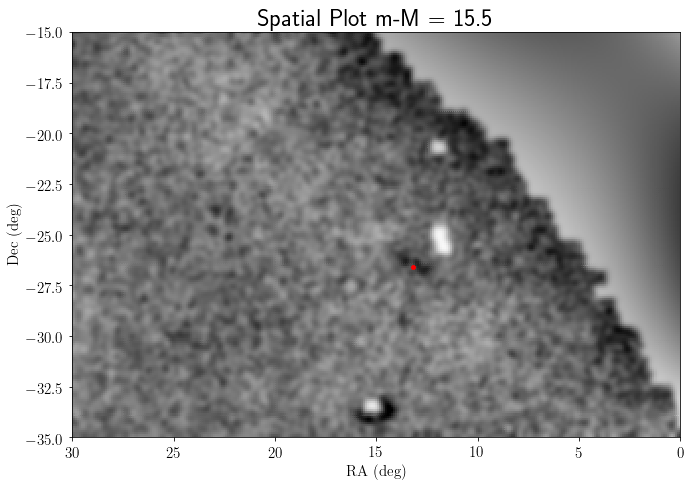

/home/s1/tavangar/.local/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


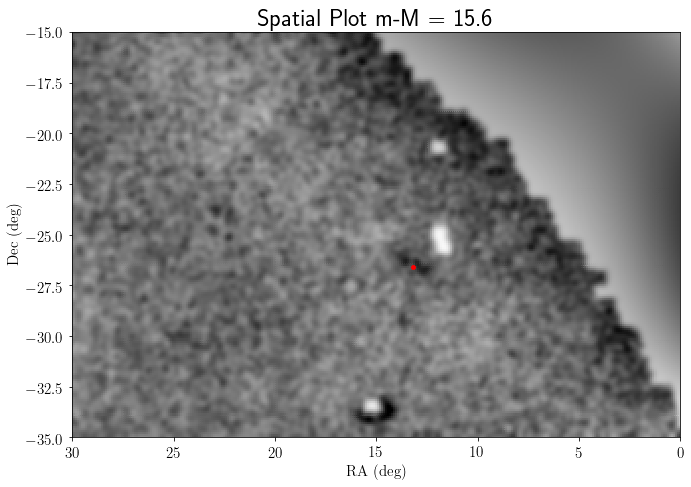

/home/s1/tavangar/.local/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


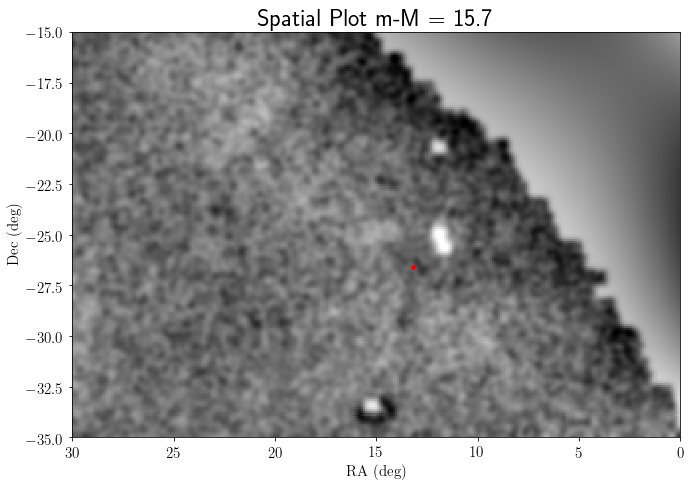

/home/s1/tavangar/.local/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


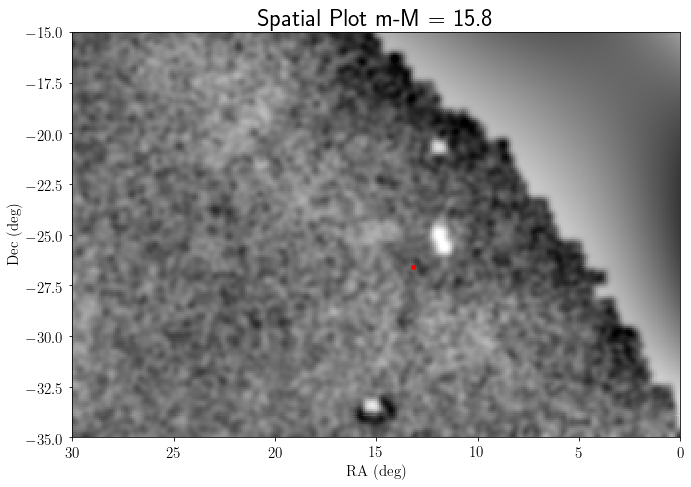

/home/s1/tavangar/.local/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


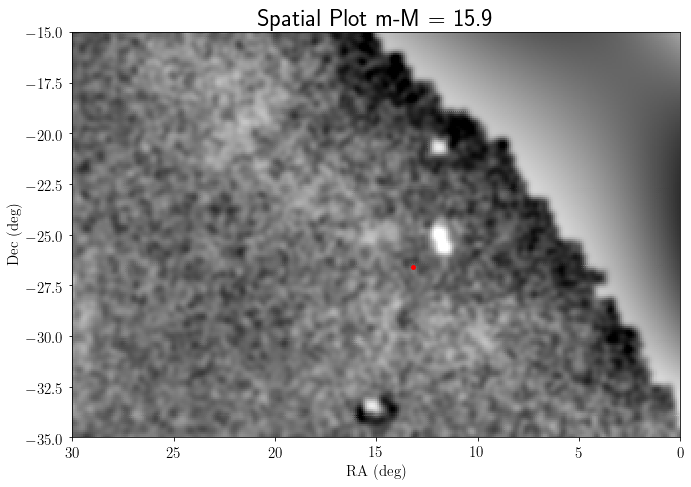

/home/s1/tavangar/.local/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


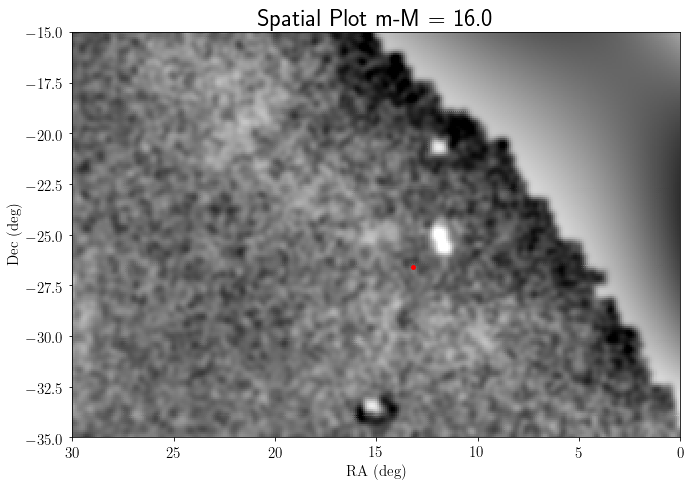

/home/s1/tavangar/.local/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


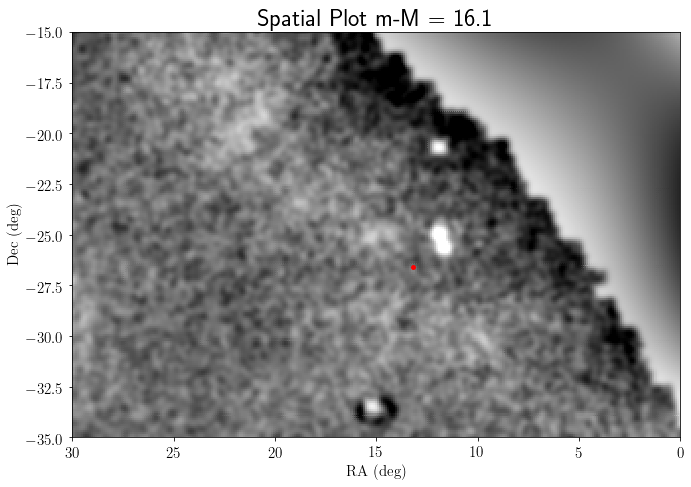

/home/s1/tavangar/.local/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


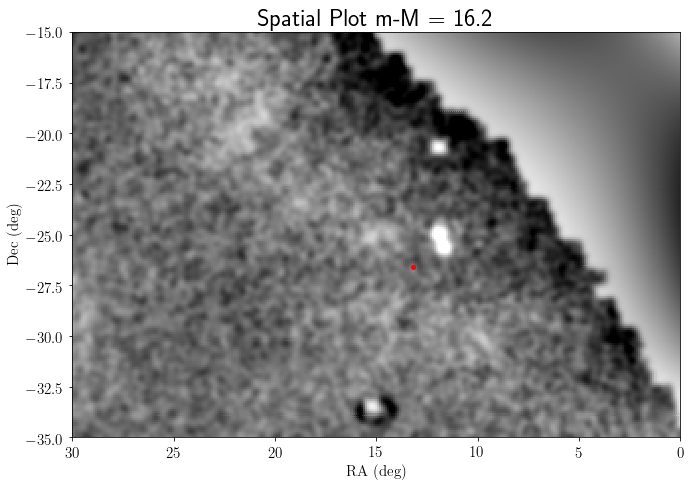

/home/s1/tavangar/.local/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


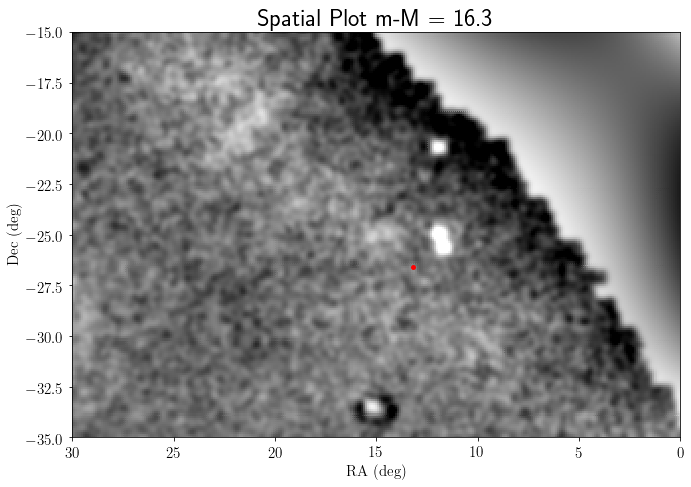

/home/s1/tavangar/.local/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


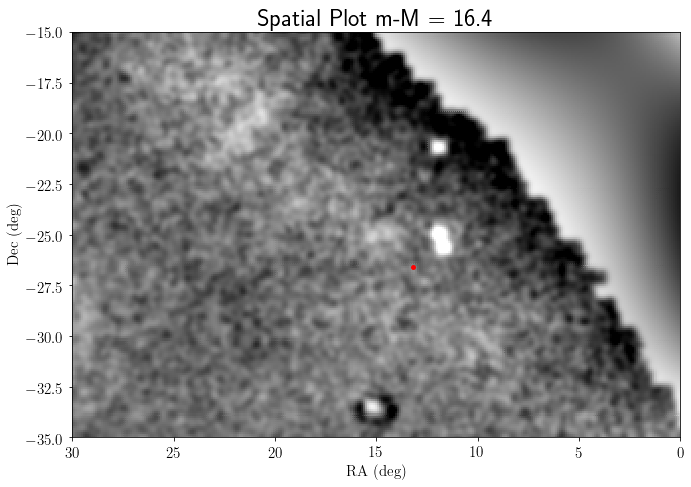

/home/s1/tavangar/.local/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


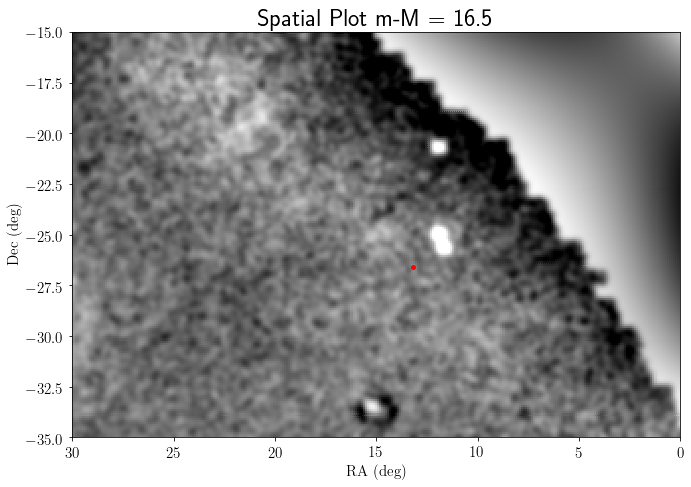

/home/s1/tavangar/.local/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


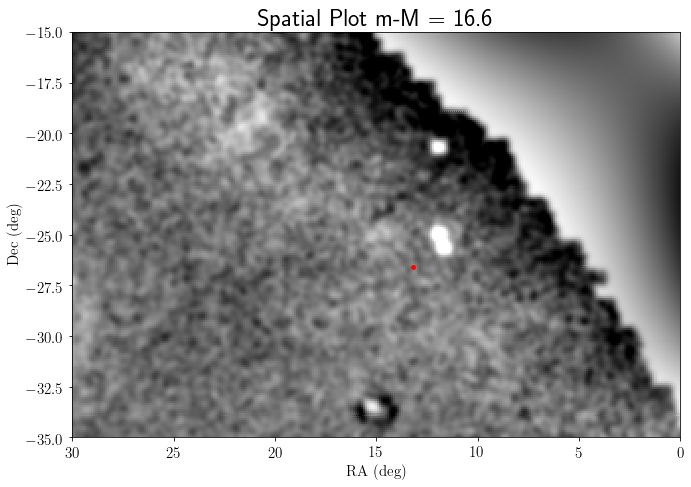

/home/s1/tavangar/.local/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


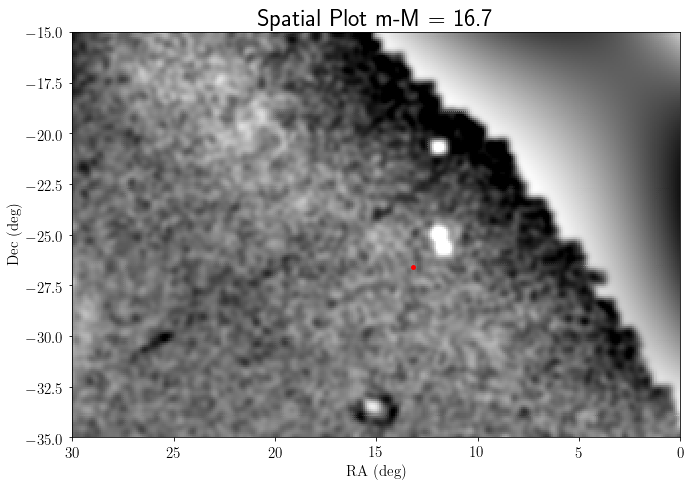

/home/s1/tavangar/.local/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


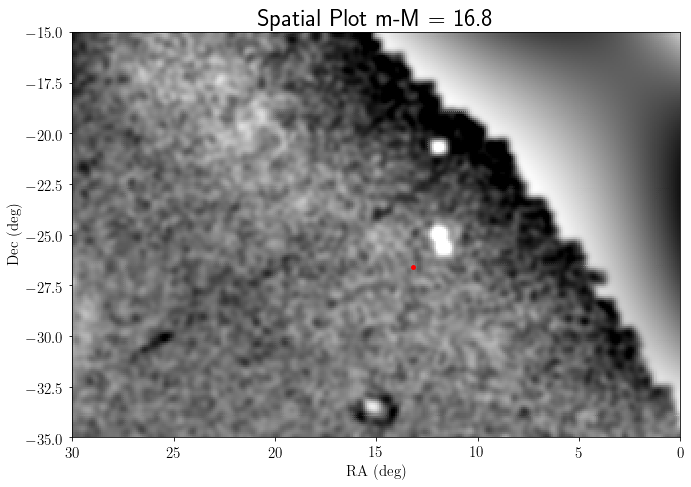

/home/s1/tavangar/.local/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


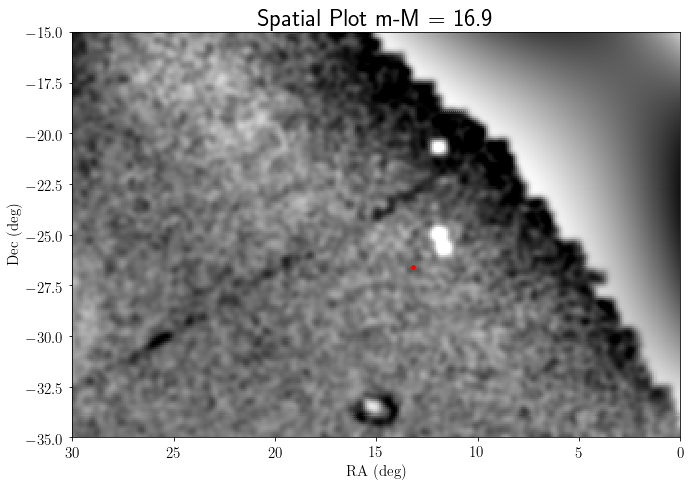

/home/s1/tavangar/.local/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


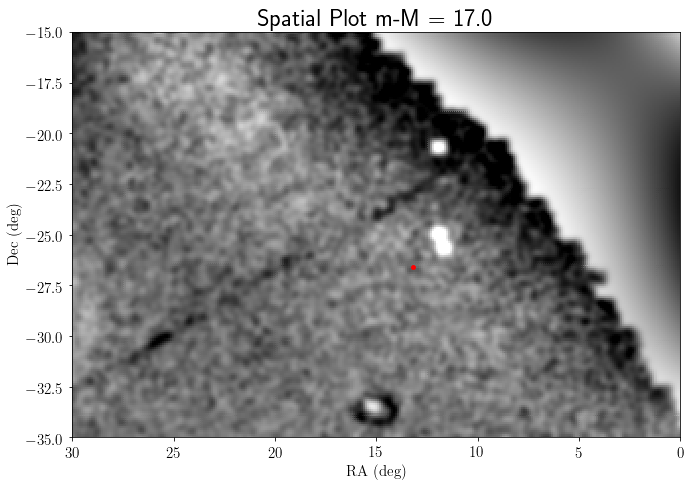

/home/s1/tavangar/.local/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


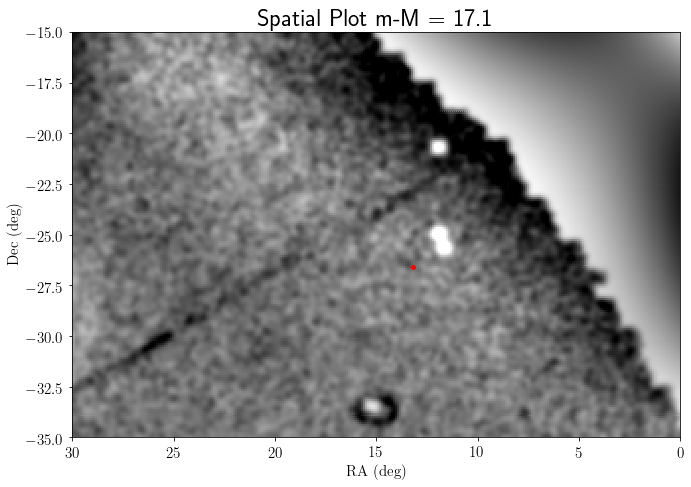

/home/s1/tavangar/.local/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


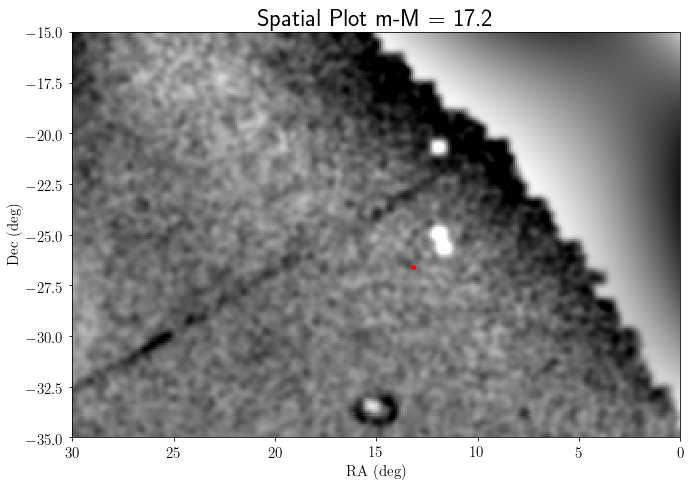

/home/s1/tavangar/.local/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


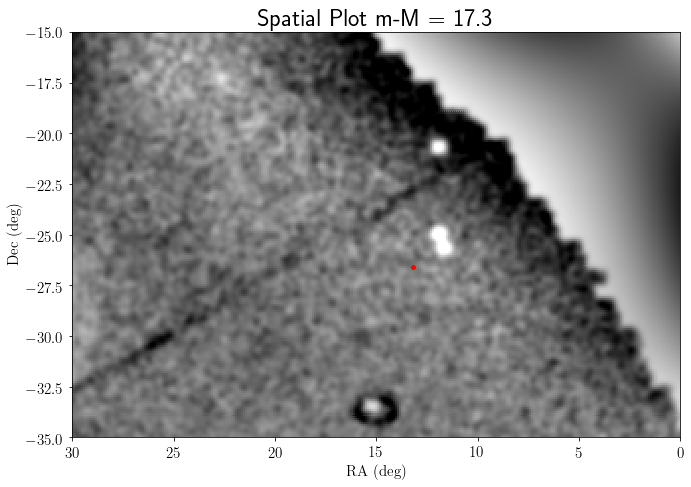

/home/s1/tavangar/.local/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


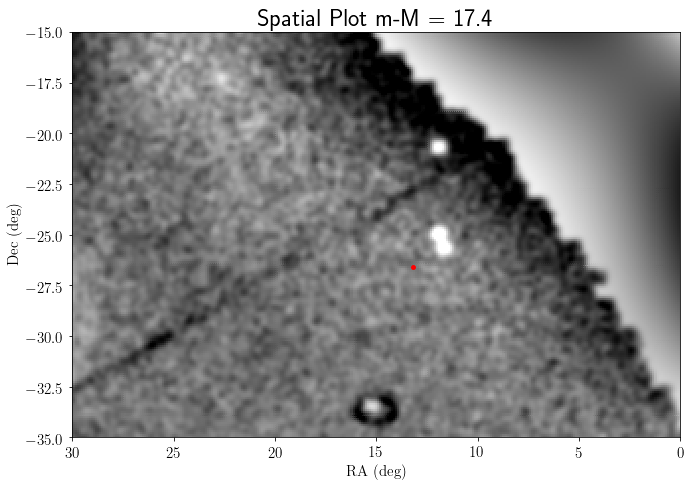

/home/s1/tavangar/.local/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


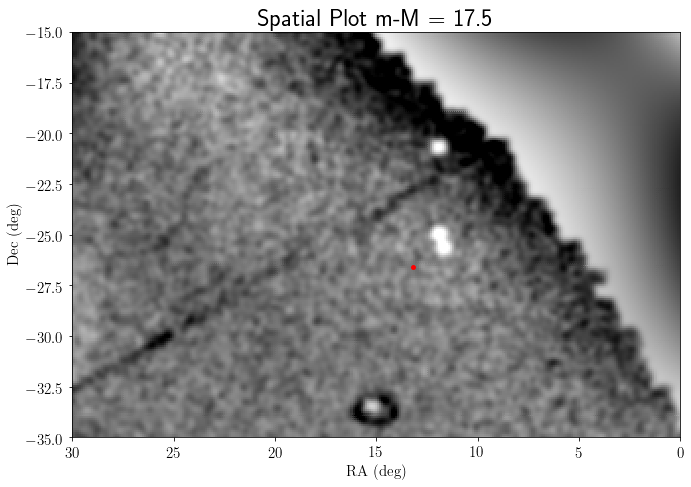

/home/s1/tavangar/.local/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


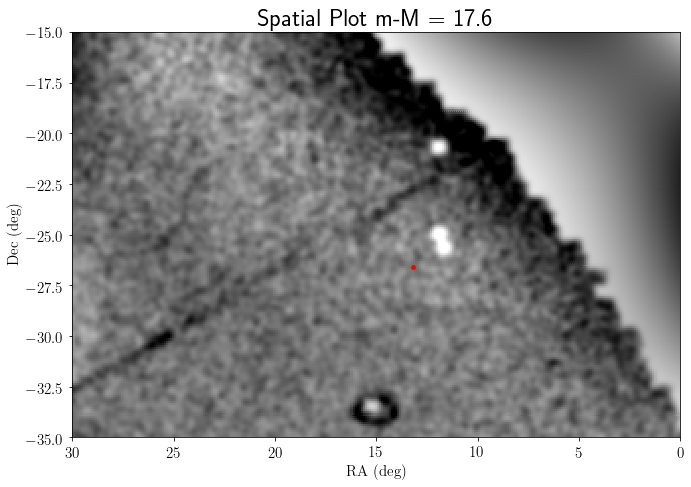

/home/s1/tavangar/.local/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


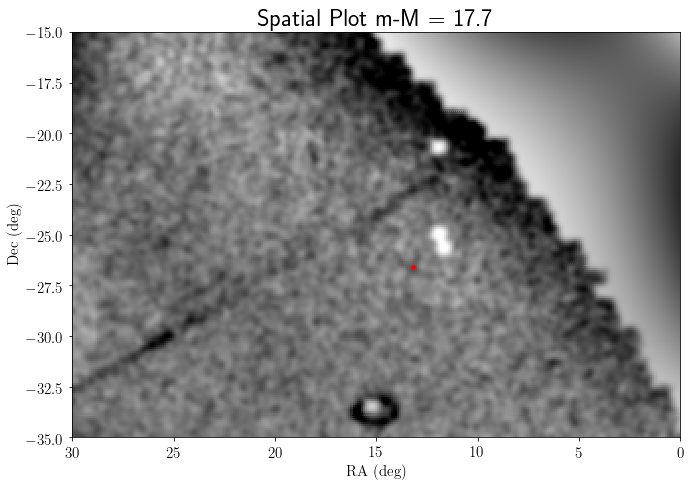

/home/s1/tavangar/.local/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


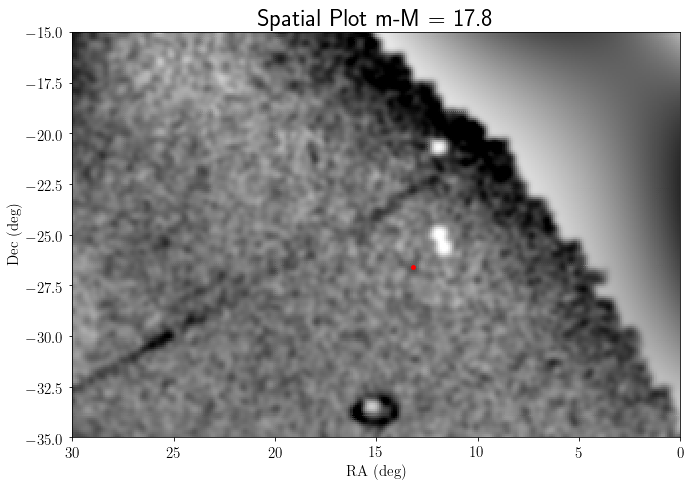

/home/s1/tavangar/.local/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


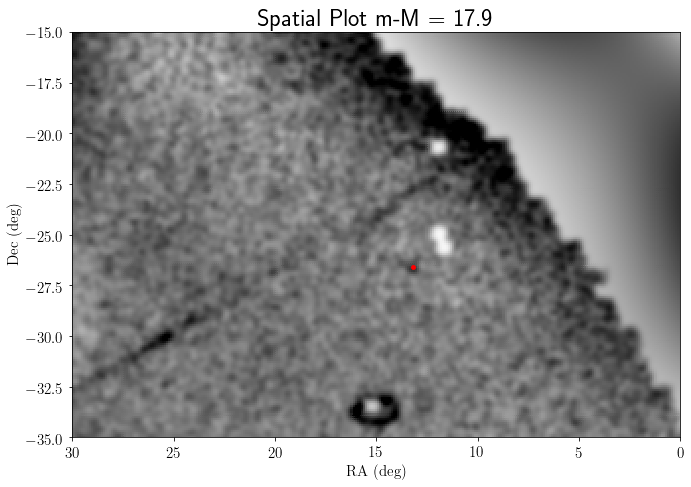

/home/s1/tavangar/.local/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


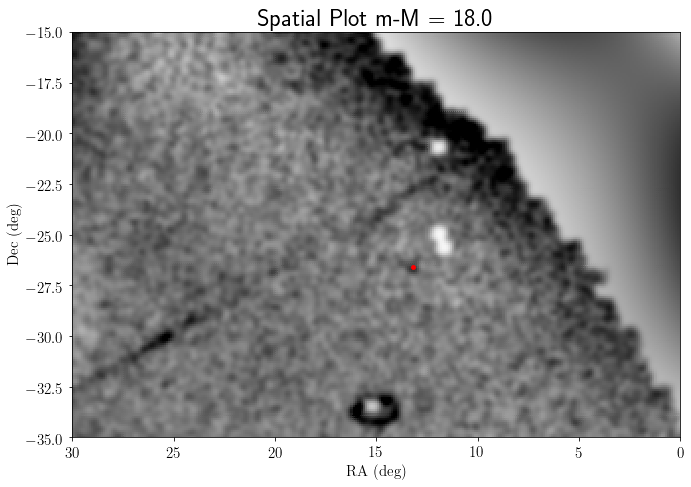

/home/s1/tavangar/.local/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


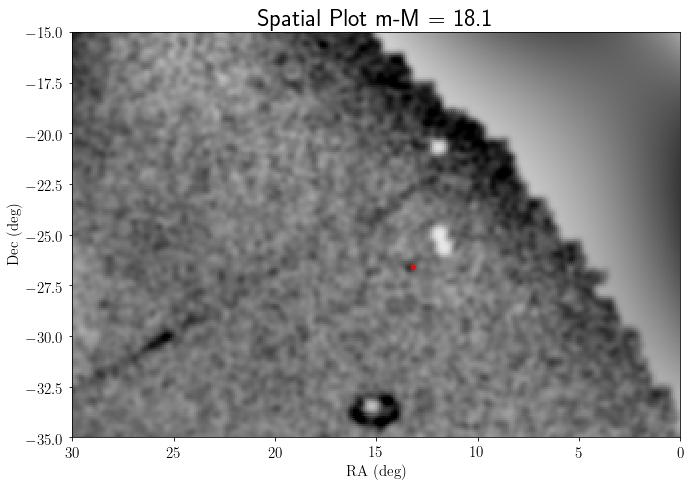

/home/s1/tavangar/.local/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


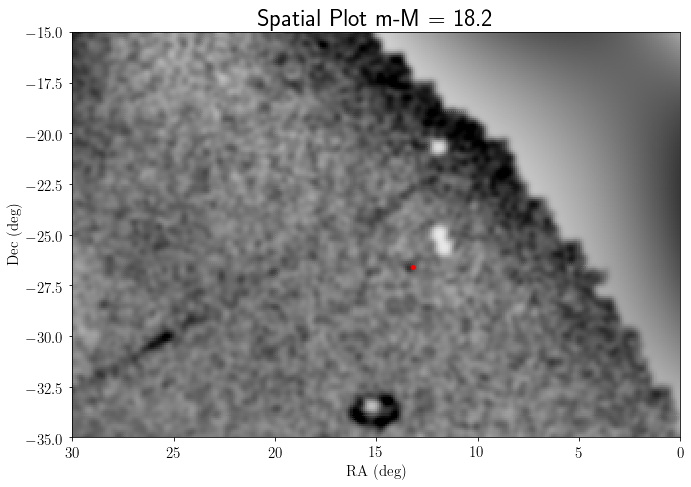

/home/s1/tavangar/.local/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


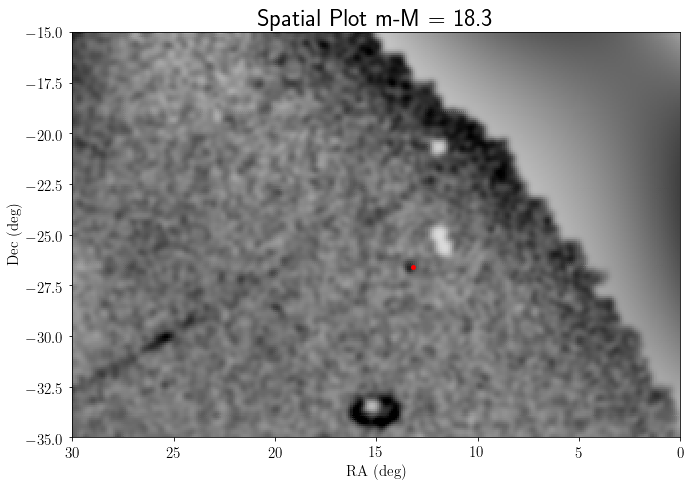

/home/s1/tavangar/.local/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


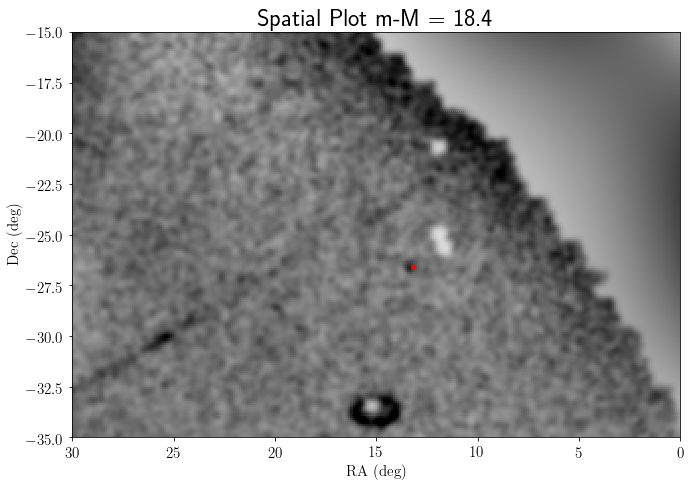

/home/s1/tavangar/.local/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


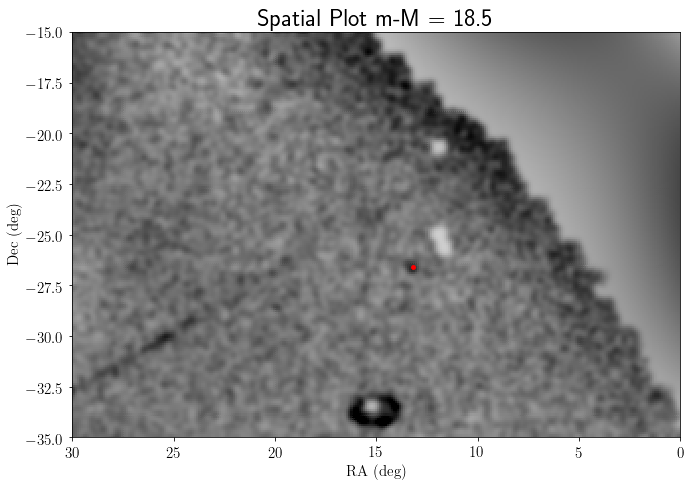

In [86]:
#Movie for NGC 288
for i in np.linspace(15.5, 18.5, 31):
    data = region_plot.prepare_hpxmap(i, hpxcube, fracdet, modulus)
    d = region_plot.run(data, dust=sfd, planck=None, sigma=0.15)
    plt.plot(figsize=(5,5))
    plt.title('Spatial\ Plot\ m-M = {}'.format(str(i)))
    plt.savefig('mov_images/ngc_288/{}_final.jpg'.format(str(int(10*i))), dpi = 'figure')

In [87]:
from PIL import Image
d155 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/ngc_288/155_final.jpg')
d156 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/ngc_288/156_final.jpg')
d157 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/ngc_288/157_final.jpg')
d158 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/ngc_288/158_final.jpg')
d159 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/ngc_288/159_final.jpg')
d160 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/ngc_288/160_final.jpg')
d161 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/ngc_288/161_final.jpg')
d162 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/ngc_288/162_final.jpg')
d163 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/ngc_288/163_final.jpg')
d164 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/ngc_288/164_final.jpg')
d165 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/ngc_288/165_final.jpg')
d166 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/ngc_288/166_final.jpg')
d167 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/ngc_288/167_final.jpg')
d168 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/ngc_288/168_final.jpg')
d169 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/ngc_288/169_final.jpg')
d170 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/ngc_288/170_final.jpg')
d171 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/ngc_288/171_final.jpg')
d172 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/ngc_288/172_final.jpg')
d173 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/ngc_288/173_final.jpg')
d174 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/ngc_288/174_final.jpg')
d175 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/ngc_288/175_final.jpg')
d176 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/ngc_288/176_final.jpg')
d177 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/ngc_288/177_final.jpg')
d178 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/ngc_288/178_final.jpg')
d179 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/ngc_288/179_final.jpg')
d180 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/ngc_288/180_final.jpg')
d181 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/ngc_288/181_final.jpg')
d182 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/ngc_288/182_final.jpg')
d183 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/ngc_288/183_final.jpg')
d184 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/ngc_288/184_final.jpg')
d185 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/ngc_288/185_final.jpg')

In [88]:
images = [d155, d156, d157, d158, d159, d160, d161, d162, d163, 
          d164, d165, d166, d167, d168, d169, d170, d171, d172, d173, d174, d175, d176, d177,
          d178, d179, d180,d181,d182,d183,d184,d185]
print(images[0])
images[0].save('ngc288final.gif', save_all=True, append_images=images, optimize=True, duration=150, loop=0)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=720x720 at 0x7FA9C0F8C490>


/data/des51.b/data/tavangar/streams/code/polyfit2d.py:29: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  c = np.linalg.lstsq(vander, f)[0]


Text(0.5,1,'m-M = 17.0')

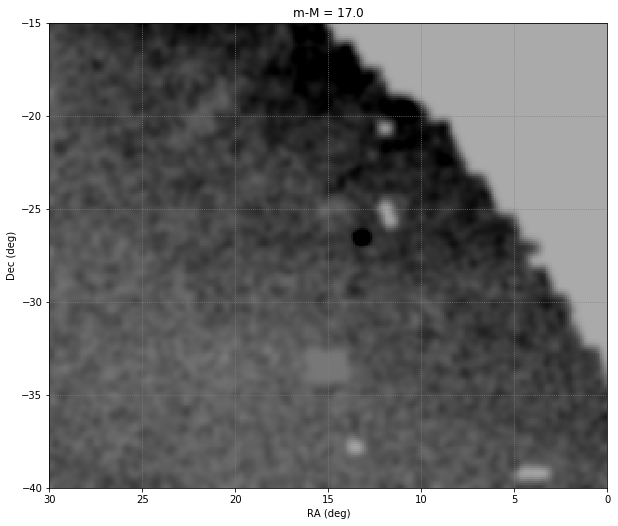

In [57]:
reload(region_plot)
%matplotlib inline
data = region_plot.prepare_hpxmap(16.3, hpxcube, fracdet, modulus)
xx,yy,vv = region_plot.run(data, dust=sfd, planck=planck, sigma=0.2)
plt.title('m-M = 17.0') 

20.0
16.789552864429826


/data/des51.b/data/tavangar/streams/code/polyfit2d.py:29: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  c = np.linalg.lstsq(vander, f)[0]
/home/s1/tavangar/.local/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


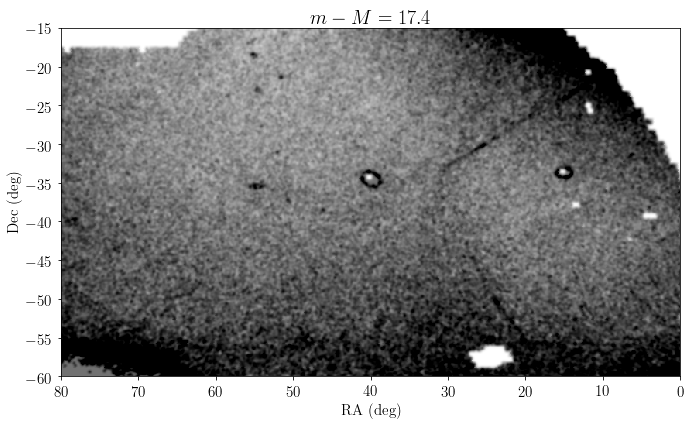

In [33]:
reload(region_plot)
%matplotlib inline
data = region_plot.prepare_hpxmap(17.6, hpxcube, fracdet, modulus)
d = region_plot.run(data, dust=sfd, planck=planck, sigma=0.15)
plt.title(r'$m-M=17.4$', fontsize=20)
plt.ylabel(r'$\mathrm{Dec\ (deg)}$', fontsize=15)
plt.xlabel(r'$\mathrm{RA\ (deg)}$', fontsize=15)
plt.savefig('Atlas_stream_region.png')

/data/des51.b/data/tavangar/streams/code/polyfit2d.py:29: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  c = np.linalg.lstsq(vander, f)[0]


Text(0.5,1,'m-M = 17.0')

/home/s1/tavangar/.local/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


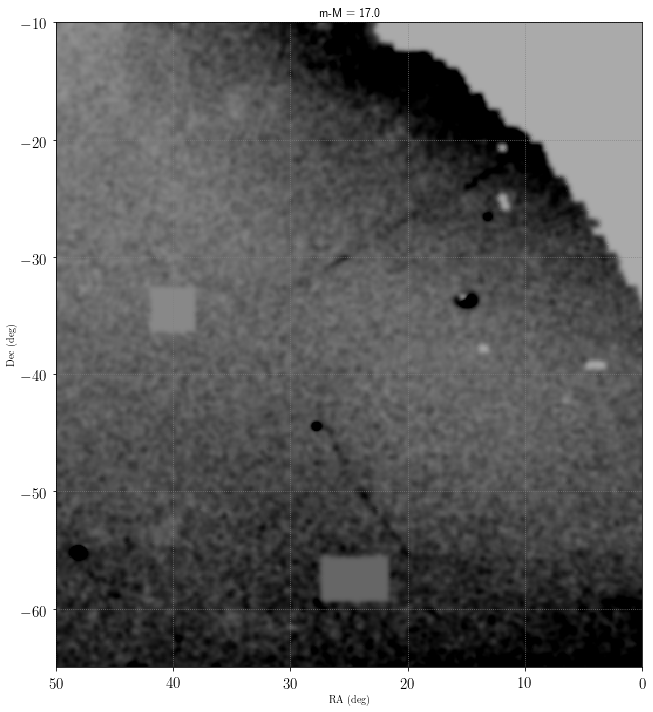

In [82]:
reload(region_plot)
%matplotlib inline
data = region_plot.prepare_hpxmap(18.0, hpxcube, fracdet, modulus)
xx,yy,vv = region_plot.run(data, dust=sfd, planck=planck, sigma=0.3)
plt.title('m-M = 18.0') 

/data/des51.b/data/tavangar/streams/code/polyfit2d.py:29: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  c = np.linalg.lstsq(vander, f)[0]


Text(0.5,1,'m-M = 17.0')

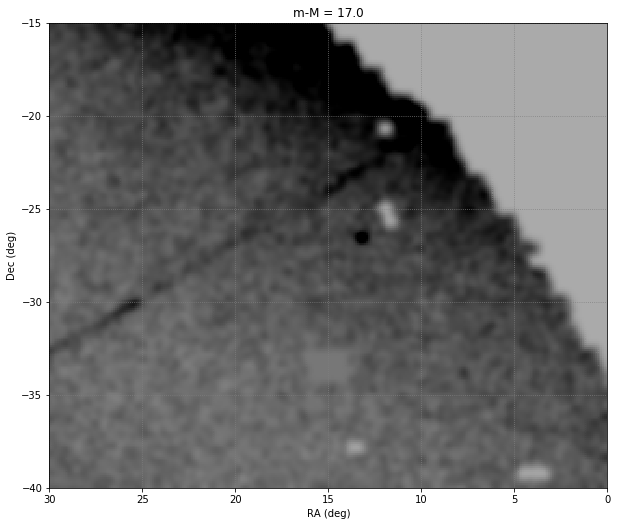

In [60]:
reload(region_plot)
%matplotlib inline
data = region_plot.prepare_hpxmap(17.2, hpxcube, fracdet, modulus)
xx,yy,vv = region_plot.run(data, dust=sfd, planck=planck, sigma=0.2)
plt.title('m-M = 17.0') 

/data/des51.b/data/tavangar/streams/code/polyfit2d.py:29: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  c = np.linalg.lstsq(vander, f)[0]


Text(0.5,1,'m-M = 17.0')

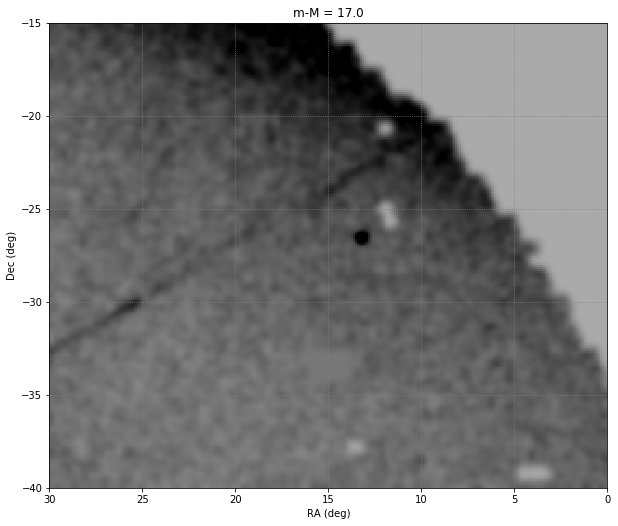

In [61]:
reload(region_plot)
%matplotlib inline
data = region_plot.prepare_hpxmap(17.5, hpxcube, fracdet, modulus)
xx,yy,vv = region_plot.run(data, dust=sfd, planck=planck, sigma=0.2)
plt.title('m-M = 17.0') 

/data/des51.b/data/tavangar/streams/code/polyfit2d.py:29: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  c = np.linalg.lstsq(vander, f)[0]


Text(0.5,1,'m-M = 17.0')

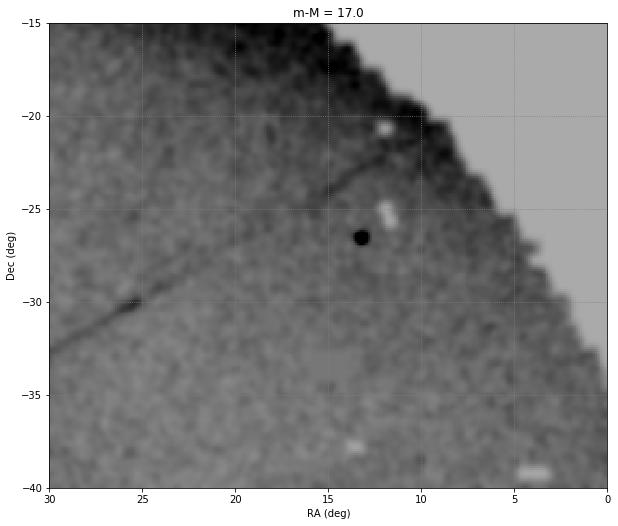

In [62]:
data = region_plot.prepare_hpxmap(17.8, hpxcube, fracdet, modulus)
d = region_plot.run(data, dust=sfd, planck=planck, sigma=0.2)
plt.title('m-M = 17.0') 

/data/des51.b/data/tavangar/streams/code/polyfit2d.py:29: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  c = np.linalg.lstsq(vander, f)[0]


Text(0.5,1,'m-M = 17.0')

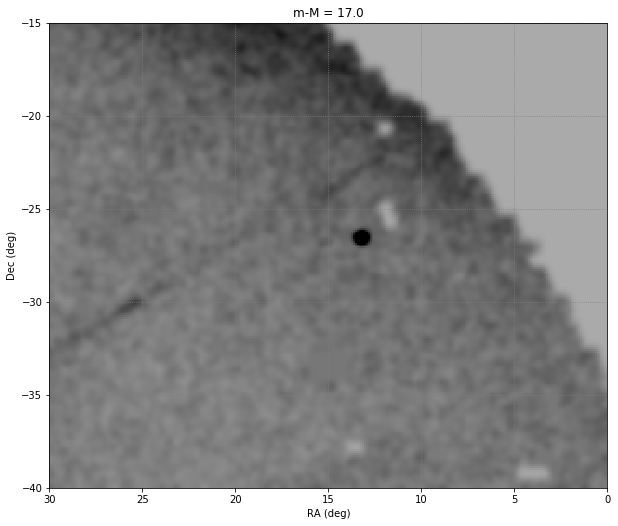

In [63]:
reload(region_plot)
%matplotlib inline
data = region_plot.prepare_hpxmap(18.1, hpxcube, fracdet, modulus)
xx,yy,vv = region_plot.run(data, dust=sfd, planck=planck, sigma=0.2)
plt.title('m-M = 17.0') 

Text(0.5,1,'m-M = 17.5')

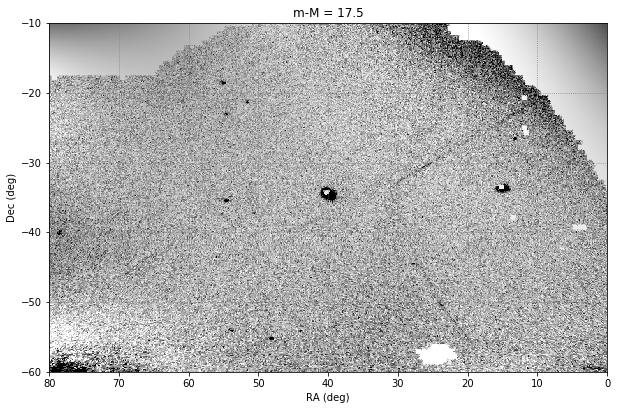

In [234]:
data = region_plot.prepare_hpxmap(17.5, hpxcube, fracdet, modulus)
d = region_plot.run(data, dust=sfd, planck=planck, sigma=0.25)
plt.title('m-M = 17.5') 

Text(0.5,1,'m-M = 18.0')

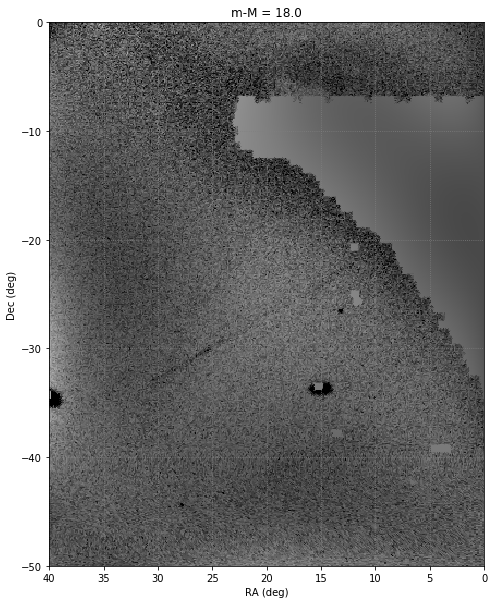

In [196]:
data = region_plot.prepare_hpxmap(18, hpxcube, fracdet, modulus)
d = region_plot.run(data, dust=sfd, planck=planck, sigma=0.25)
plt.title('m-M = 18.0') 

Text(0.5,1,'m-M = 18.5')

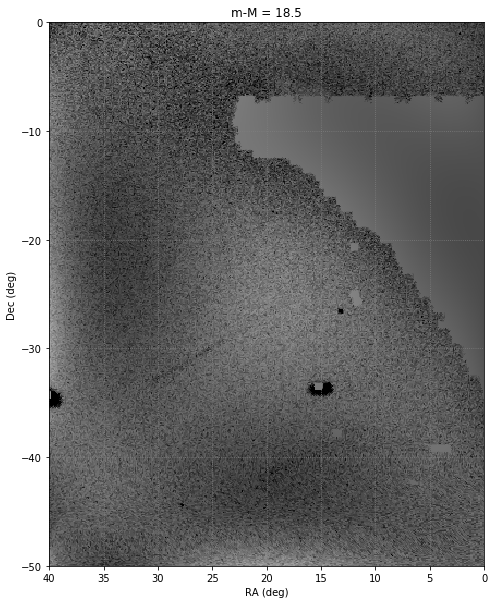

In [132]:
data = region_plot.prepare_hpxmap(18.5, hpxcube, fracdet, modulus)
d = region_plot.run(data, dust=sfd, planck=planck, sigma=0.25)
plt.title('m-M = 18.5') 

Text(0.5,1,'m-M = 19.0')

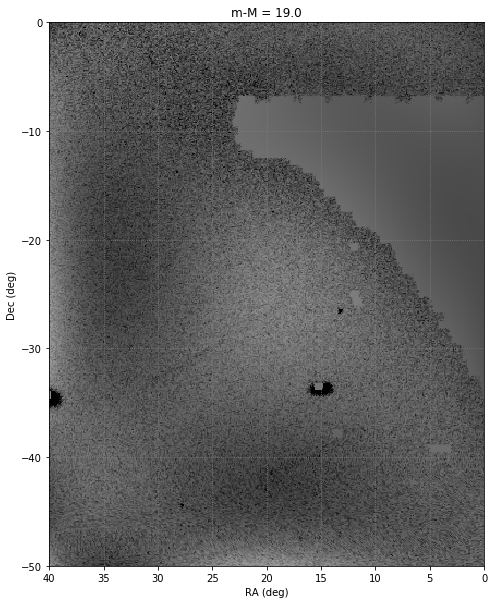

In [133]:
data = region_plot.prepare_hpxmap(19, hpxcube, fracdet, modulus)
d = region_plot.run(data, dust=sfd, planck=planck, sigma=0.25)
plt.title('m-M = 19.0') 

Text(0.5,1,'m-M = 19.5')

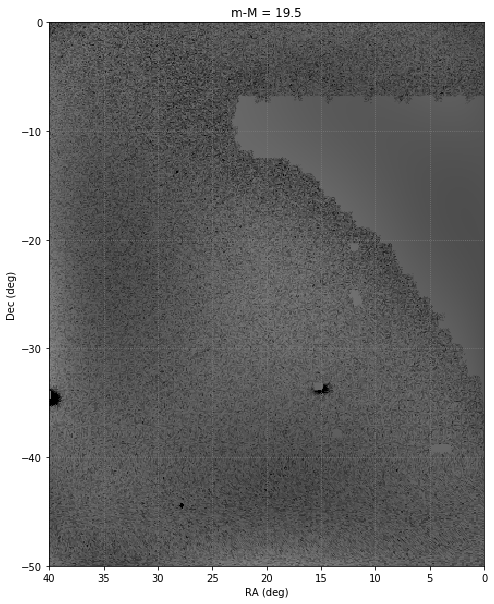

In [134]:
data = region_plot.prepare_hpxmap(19.5, hpxcube, fracdet, modulus)
d = region_plot.run(data, dust=sfd, planck=planck, sigma=0.25)
plt.title('m-M = 19.5') 

Text(0.5,1,'m-M = 20.0')

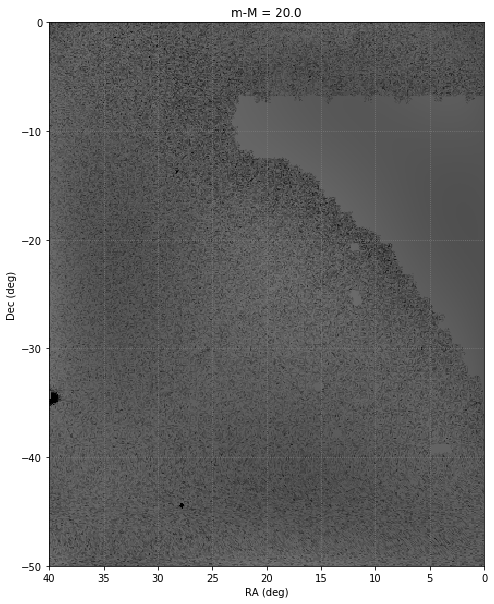

In [135]:
data = region_plot.prepare_hpxmap(20.5, hpxcube, fracdet, modulus)
d = region_plot.run(data, dust=sfd, planck=planck, sigma=0.25)
plt.title('m-M = 20.0') 

Text(0.5,1,'m-M = 20.5')

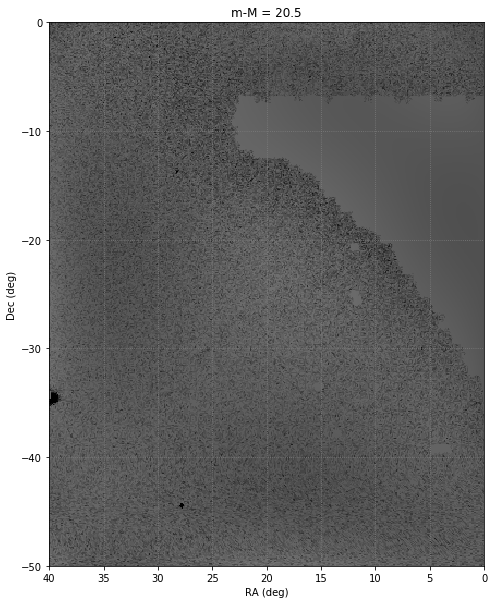

In [136]:
data = region_plot.prepare_hpxmap(20.5, hpxcube, fracdet, modulus)
d = region_plot.run(data, dust=sfd, planck=planck, sigma=0.25)
plt.title('m-M = 20.5') 

## Atlas Stream

In [58]:
def run_atlas(hpxmap, dust=None, planck=None, sigma=0.2,**kwargs):
    defaults = dict(cmap='gray_r')
    setdefaults(kwargs, defaults)

    pixscale = 0.1 # deg/pix
    xmin,xmax = 0,40
    nxpix = int( (xmax-xmin)/0.1)
    ymin,ymax = -50,-0
    nypix = int( (ymax-ymin)/0.1)
    x = np.linspace(xmin,xmax,nxpix)
    y = np.linspace(ymin,ymax,nypix)
    xx,yy = np.meshgrid(x,y)
    
    nside = hp.get_nside(hpxmap)
    pix = hp.ang2pix(nside,xx.flat,yy.flat,lonlat=True)
    val = hpxmap[pix]
    vv = val.reshape(xx.shape)

    # Smoothed data
    smooth = nd.gaussian_filter(vv, sigma=sigma/pixscale)

    deg = 5 
    coeff = polyfit2d(xx.flat, yy.flat, smooth.flat, [deg, deg])
    bkg = polynomial.polyval2d(xx, yy, coeff)    

    plt.figure(figsize=(10,10))
    plt.title('data - bkg')
    plt.set_cmap('gray_r')
    kwargs.update(vmin=-4,vmax=5)
    draw_image(xx,yy,smooth-bkg,**kwargs)
    
    return xx,yy,vv



/data/des51.b/data/tavangar/streams/code/polyfit2d.py:29: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  c = np.linalg.lstsq(vander, f)[0]


Text(0.5,1,'m-M = 18.0')

/home/s1/tavangar/.local/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


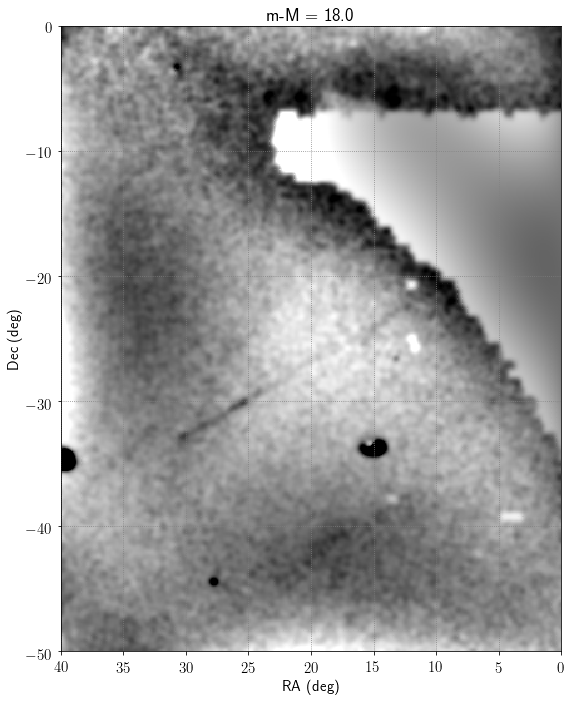

In [59]:
reload(region_plot)
data = region_plot.prepare_hpxmap(18.0, hpxcube, fracdet, modulus)
d = run_atlas(data, dust=sfd, planck=planck, sigma=0.2)
plt.title('m-M = 18.0') 

## Phoenix Stream and Extension

In [20]:
def run_phoenix(hpxmap, dust=None, planck=None, sigma=0.2,**kwargs):
    defaults = dict(cmap='gray_r')
    setdefaults(kwargs, defaults)

    pixscale = 0.1 # deg/pix
    xmin,xmax = 15,40
    nxpix = int( (xmax-xmin)/0.1)
    ymin,ymax = -65,-35
    nypix = int( (ymax-ymin)/0.1)
    x = np.linspace(xmin,xmax,nxpix)
    y = np.linspace(ymin,ymax,nypix)
    xx,yy = np.meshgrid(x,y)
    
    nside = hp.get_nside(hpxmap)
    pix = hp.ang2pix(nside,xx.flat,yy.flat,lonlat=True)
    val = hpxmap[pix]
    vv = val.reshape(xx.shape)
    
    rem = make_mask(xx,yy,24.,-57.5,1, 1.2)
    vv.flat[rem] = 3
    
    
    # Smoothed data
    smooth = nd.gaussian_filter(vv, sigma=sigma/pixscale)

    deg = 5 
    coeff = polyfit2d(xx.flat, yy.flat, smooth.flat, [deg, deg])
    bkg = polynomial.polyval2d(xx, yy, coeff)
       

    plt.figure(figsize=(10,10))
    plt.title('data - bkg')
    plt.set_cmap('gray_r')
    kwargs.update(vmin=-4,vmax=10)
    draw_image(xx,yy,smooth,**kwargs)
    
    return xx,yy,smooth

20.0
14.065625183599877


/data/des51.b/data/tavangar/streams/code/polyfit2d.py:29: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  c = np.linalg.lstsq(vander, f)[0]
/home/s1/tavangar/.local/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


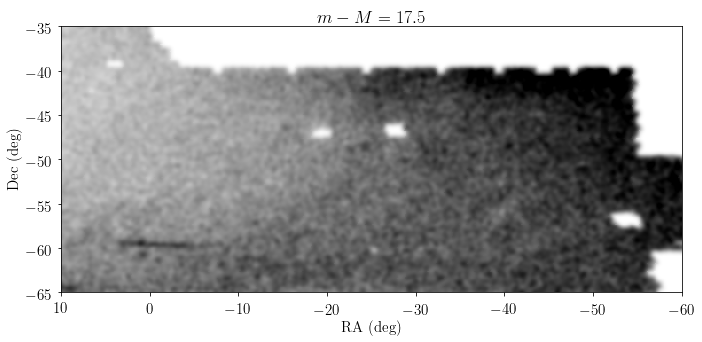

In [140]:
reload(region_plot)
data = region_plot.prepare_hpxmap(17.5, hpxcube, fracdet, modulus)
d = region_plot.run(data, dust=sfd, planck=planck, sigma=0.25)
plt.title(r'$m-M=17.5$')
plt.savefig('quadrant1_streams.png')

## Specific for Pal 13

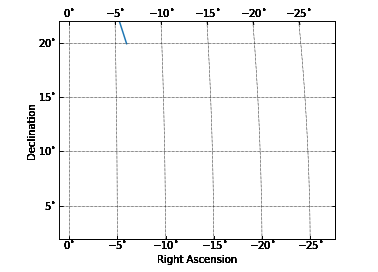

In [3]:
import plot_pal13

In [4]:
hpxcube1, fracdet1, modulus1 = plot_pal13.load_hpxcube(
    '/home/s1/nshipp/projects/stream_search/data/DECaLS_iso_hpxcube_z0.0001_a13.5_gmax23_gmin3p4_E2_C-0p020p1.fits.gz')

'''
for i in range(155,186):
    print(i/10.)
    data = plot_pal13.prepare_hpxmap(i/10., hpxcube1, fracdet1, modulus1)
    d = plot_pal13.run(data, dust=sfd, planck=planck, sigma=0.25)
    plt.plot(figsize=(8,8))
    plt.title(r'$\mathrm{m-M = \: }$' + '{}'.format(str(i/10.)))
    plt.savefig('/data/des51.b/data/tavangar/streams/mov_images/{}_paper.png'.format(str(i)), dpi=200)
'''

#hpxcube2, fracdet2, modulus2 = plot_pal13.load_hpxcube(
#    '/home/s1/kadrlica/projects/pal13/v0/DECaLS_iso_hpxcube_z0.0010_a11.0_gmax23_gmin20.2_E3.fits.gz')
#data2 = plot_pal13.prepare_hpxmap(mu, hpxcube2, fracdet2, modulus2)
#bkg2 = plot_pal13.fit_bkg_poly(data2)

Reading /home/s1/nshipp/projects/stream_search/data/DECaLS_iso_hpxcube_z0.0001_a13.5_gmax23_gmin3p4_E2_C-0p020p1.fits.gz...
Skipping fracdet...


"\nfor i in range(155,186):\n    print(i/10.)\n    data = plot_pal13.prepare_hpxmap(i/10., hpxcube1, fracdet1, modulus1)\n    d = plot_pal13.run(data, dust=sfd, planck=planck, sigma=0.25)\n    plt.plot(figsize=(8,8))\n    plt.title(r'$\\mathrm{m-M = \\: }$' + '{}'.format(str(i/10.)))\n    plt.savefig('/data/des51.b/data/tavangar/streams/mov_images/{}_paper.png'.format(str(i)), dpi=200)\n"

3.745751657733118
5.127630185805659


/data/des81.b/data/tavangar/streams/code/polyfit2d.py:29: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  c = np.linalg.lstsq(vander, f)[0]


3145728


/home/s1/tavangar/.local/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
/home/s1/tavangar/.local/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
/home/s1/tavangar/.local/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


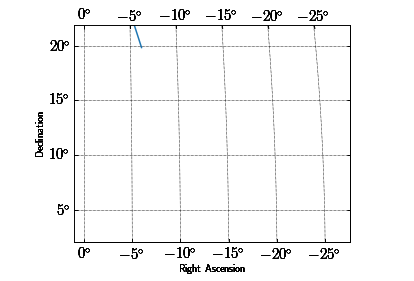

/home/s1/tavangar/.local/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


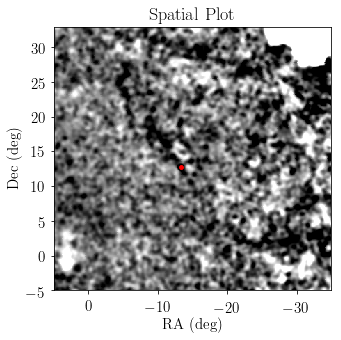

In [11]:
%matplotlib inline
reload(plot_pal13)
data10 = plot_pal13.prepare_hpxmap(16.4, hpxcube1, fracdet1, modulus1)
data11 = plot_pal13.prepare_hpxmap(16.5, hpxcube1, fracdet1, modulus1)
data12 = plot_pal13.prepare_hpxmap(16.6, hpxcube1, fracdet1, modulus1)
data13 = plot_pal13.prepare_hpxmap(16.7, hpxcube1, fracdet1, modulus1)
data14 = plot_pal13.prepare_hpxmap(16.8, hpxcube1, fracdet1, modulus1)
data15 = plot_pal13.prepare_hpxmap(16.9, hpxcube1, fracdet1, modulus1)
data16 = plot_pal13.prepare_hpxmap(17.0, hpxcube1, fracdet1, modulus1)
data17 = plot_pal13.prepare_hpxmap(17.1, hpxcube1, fracdet1, modulus1)
data18 = plot_pal13.prepare_hpxmap(17.2, hpxcube1, fracdet1, modulus1)
data1 = (data10+data11+data12+data13+data14+data15+data16+data17+data18)/9
d = plot_pal13.run(data1, dust=sfd, planck=None, sigma=0.25)
#plt.savefig('Pal13_spatial_plot.jpg')

In [5]:
from utils import load_infiles

filenames = glob.glob('/data/des81.b/data/tavangar/skim_y6_gold_1_1/*.fits')
full_data = load_infiles(filenames,columns=[
    'RA','DEC','SOF_PSF_MAG_CORRECTED_G','SOF_PSF_MAG_CORRECTED_R','SOF_PSF_MAG_CORRECTED_I','EXT_SOF'],multiproc=8)

full_data = full_data[full_data['EXT_SOF'] < 2]
full_data = full_data[(full_data['SOF_PSF_MAG_CORRECTED_G'] < 24.0)]# & (full_data['SOF_PSF_MAG_CORRECTED_G'] > 20.2)]
full_data = full_data[(full_data['SOF_PSF_MAG_CORRECTED_G']-full_data['SOF_PSF_MAG_CORRECTED_R'] < 1)
          &(full_data['SOF_PSF_MAG_CORRECTED_G']-full_data['SOF_PSF_MAG_CORRECTED_R'] > 0)]
print(len(full_data))

17688359


In [13]:
reload(plot_pal13)
%matplotlib inline
d = plot_pal13.prepare_hpxmap(16.8, hpxcube1, fracdet1, modulus1)
pal13_ends = [-9.8, 18.2, -15.7, 8.9]   
pp1, pp2, vv = plot_pal13.stream_coord_spatial(d, pal13_ends, sigma=0.15)
#plt.title('m-M=16.8')

[0. 0. 0. ... 0. 0. 0.]


/data/des81.b/data/tavangar/streams/code/polyfit2d.py:29: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  c = np.linalg.lstsq(vander, f)[0]


Error in callback <function post_execute at 0x7f36aedbd938> (for post_execute):


OSError: [Errno 2] No such file or directory: 'dvipng'

OSError: [Errno 2] No such file or directory: 'dvipng'

<Figure size 720x720 with 1 Axes>

In [69]:
a = np.array([[1,2,3,4,5,6,7,8], [4,7,9,2,5,4,7,8]])

print(np.abs(a - 9.001).argmin())

10


## Making a Movie

In [64]:
from PIL import Image
d155 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/155_paper.jpg')
d156 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/156_paper.jpg')
d157 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/157_paper.jpg')
d158 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/158_paper.jpg')
d159 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/159_paper.jpg')
d160 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/160_paper.jpg')
d161 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/161_paper.jpg')
d162 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/162_paper.jpg')
d163 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/163_paper.jpg')
d164 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/164_paper.jpg')
d165 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/165_paper.jpg')
d166 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/166_paper.jpg')
d167 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/167_paper.jpg')
d168 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/168_paper.jpg')
d169 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/169_paper.jpg')
d170 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/170_paper.jpg')
d171 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/171_paper.jpg')
d172 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/172_paper.jpg')
d173 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/173_paper.jpg')
d174 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/174_paper.jpg')
d175 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/175_paper.jpg')
d176 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/176_paper.jpg')
d177 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/177_paper.jpg')
d178 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/178_paper.jpg')
d179 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/179_paper.jpg')
d180 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/180_paper.jpg')
d181 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/181_paper.jpg')
d182 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/182_paper.jpg')
d183 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/183_paper.jpg')
d184 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/184_paper.jpg')
d185 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/185_paper.jpg')

In [66]:
d155 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/155_paper.png')
d156 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/156_paper.png')
d157 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/157_paper.png')
d158 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/158_paper.png')
d159 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/159_paper.png')
d160 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/160_paper.png')
d161 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/161_paper.png')
d162 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/162_paper.png')
d163 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/163_paper.png')
d164 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/164_paper.png')
d165 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/165_paper.png')
d166 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/166_paper.png')
d167 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/167_paper.png')
d168 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/168_paper.png')
d169 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/169_paper.png')
d170 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/170_paper.png')
d171 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/171_paper.png')
d172 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/172_paper.png')
d173 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/173_paper.png')
d174 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/174_paper.png')
d175 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/175_paper.png')
d176 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/176_paper.png')
d177 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/177_paper.png')
d178 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/178_paper.png')
d179 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/179_paper.png')
d180 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/180_paper.png')
d181 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/181_paper.png')
d182 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/182_paper.png')
d183 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/183_paper.png')
d184 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/184_paper.png')
d185 = Image.open('/data/des51.b/data/tavangar/streams/mov_images/185_paper.png')

In [67]:
images = [d155, d156, d157, d158, d159, d160, d161, d162, d163, 
          d164, d165, d166, d167, d168, d169, d170, d171, d172, d173, d174, d175, d176, d177,
          d178, d179, d180, d181, d182, d183, d184, d185]
print(images[0])
images[0].save('pal13paper1.gif', save_all=True, append_images=images, optimize=True, duration=150, loop=0)

<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1000x1000 at 0x7FACF5D5C710>


In [52]:
filebase = '%s_paper.png'
pngfile = filebase.format()%'*'
cmd='convert -delay %i -quality 100 %s %s'%(40,pngfile,'pal13paper1.gif')
print(cmd)

convert -delay 40 -quality 100 *_wide_paper.png pal13widepaper2.gif


In [53]:
import subprocess
subprocess.check_call(cmd, shell=True)

OSError: [Errno 2] No such file or directory